In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from fig_style import *

import sys
sys.path.insert(0,'../')
from disk_model import DiskFitting, DiskImage

import astropy.constants as const
au = const.au.cgs.value

In [2]:
import astropy
data_all = astropy.table.Table.read("../data/VANDAM_T20_properties.txt", format="ascii")
data_all.add_index('Source')

In [3]:
source_list = np.load("../data/Xu22_sources.npy")

In [4]:
def get_pa_diff(pa1, pa2):
    dpa = abs(pa1-pa2)
    if dpa>90:
        dpa = 180-dpa
    return dpa

In [5]:
def get_dpa(cosI_crit, inverse=False):
    pa_a = []
    pa_v = []
    for s in source_list:
        i = data_all.loc_indices[s]
        include = (data_all['A_dBmaj'][i]*cosI_crit >= data_all['A_dBmin'][i])
        if inverse: include=~include
        if include:
            pa_a.append(data_all['A_dPA'][i])
            pa_v.append(data_all['V_dPA'][i])
    if len(pa_a)==0:
        return np.array([np.nan])
    return np.vectorize(get_pa_diff)(pa_a, pa_v)

In [6]:
def get_cosI():
    cosI = []
    for s in source_list:
        i = data_all.loc_indices[s]
        cosI.append(data_all['A_dBmin'][i]/data_all['A_dBmaj'][i])
    return cosI

Text(0.5, 0, 'Misalignment between 0.78 mm and 9 mm emission [deg]')

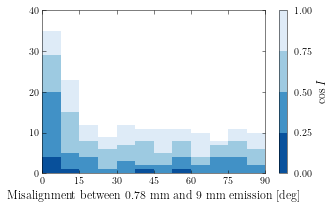

In [7]:
fig = plt.figure(figsize=(5,3))
bins = np.linspace(0,90,6*2+1)
import matplotlib
cosI_list = np.linspace(1, 0.25, 4)
N = len(cosI_list)
colors = matplotlib.cm.get_cmap('Blues')((np.arange(N)+0.5)/N)
for i in range(N):
    plt.hist(get_dpa(cosI_list[i]), bins=bins, density=False, color=colors[i])
#for cosI in [1]:
#    plt.hist(get_dpa(cosI), bins=bins, density=False, histtype='step', color='k')

plt.contourf([-1,-1],[-1,-1],np.ones((2,2)),levels=np.linspace(0,1,5),cmap='Blues_r')
cb = plt.colorbar(label=r'$\cos I$')
cb.ax.tick_params(width=0)

plt.xlim(0,90)
plt.ylim(0,40)
plt.yticks([0,10,20,30,40])
plt.xticks([0,15,30,45,60,75,90])
set_ticks()
plt.xlabel('Misalignment between 0.78 mm and 9 mm emission [deg]')
#plt.savefig('../figures/free_free_alignment.pdf',bbox_inches='tight')

# Estimate using scalings in 